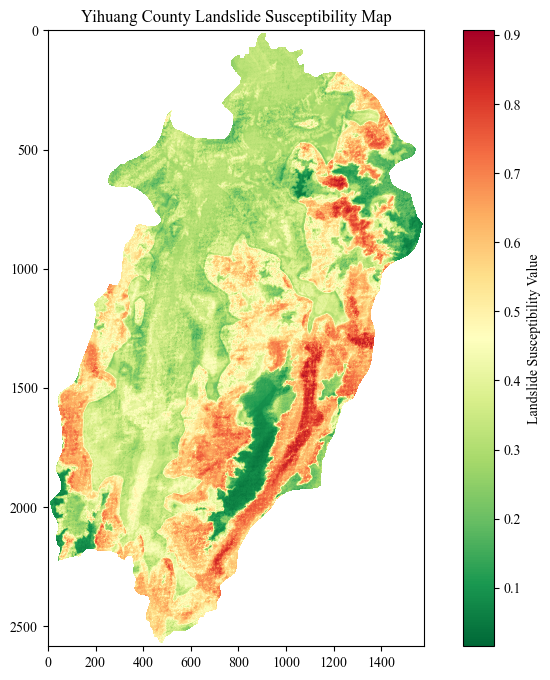

In [1]:
import numpy as np
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False

# 1. 读取易发性栅格数据
raster_path = r"D:\MachineLearningTrain2\bbb\RFC.tif"
with rasterio.open(raster_path) as src:
    susceptibility_data = src.read(1)
    profile = src.profile

# 2. 读取宜黄县高程栅格（作为掩膜）
dem_path = r"D:\MachineLearningTrain2\bbbb\宜黄dem.tif"
with rasterio.open(dem_path) as dem_src:
    dem_mask = dem_src.read(1) != dem_src.nodata  # 创建布尔掩膜

# 3. 空间对齐验证（关键！）
if susceptibility_data.shape != dem_mask.shape:
    raise ValueError("易发性数据与DEM尺寸不匹配，需检查坐标系和分辨率是否一致")

# 4. 应用掩膜去除多余区域
masked_susceptibility = np.where(dem_mask, susceptibility_data, np.nan)

# 5. 可视化设置
plt.figure(figsize=(10, 8))
cmap = plt.cm.RdYlGn_r
cmap.set_bad('white', 1.0)  # 掩膜外显示为白色

# 6. 显示数据
img = plt.imshow(masked_susceptibility, cmap=cmap)
plt.colorbar(img, label='Landslide Susceptibility Value')
plt.title('Yihuang County Landslide Susceptibility Map')

# 7. 保存与显示
plt.savefig('Landslide_Susceptibility_MapRFC_Masked.png', dpi=300, bbox_inches='tight')
plt.show()